In [42]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [44]:
X = np.array([[-1, 0, 2, 3, 4, 5]]).T
y = np.array([[-3, 1, 2, 4, 1, 2]]).T

In [45]:
model = GPy.models.GPRegression(X, y, kernel)
model.Gaussian_noise.variance = 1e-10
model.Gaussian_noise.variance.fix()
model.optimize()

 /usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


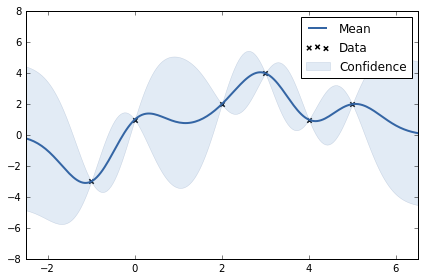

In [46]:
model.plot()

In [47]:
print(model)


Name : GP regression
Objective : 13.532648722067806
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |           value  |  constraints  |  priors
  rbf.variance             |   5.65288590604  |      +ve      |        
  rbf.lengthscale          |  0.632201657964  |      +ve      |        
  Gaussian_noise.variance  |           1e-10  |   fixed +ve   |        


In [48]:
np.savetxt(
    "gp_presentation_data.dat",
    np.hstack((X, y)),
    delimiter='\t',
    comments='',
    header='\t'.join(["X", "y"])
)

In [76]:
def predictions(model, name, noiseless=False):
    Xt = np.arange(-10, 10, 0.05)[:, None]
    if noiseless:
        mu, Sigma = model.predict_noiseless(Xt, full_cov=True)
    else:
        mu, Sigma = model.predict(Xt, full_cov=True)
    twostd = 2 * np.sqrt(np.diag(Sigma)[:, None])
    np.savetxt(
        name,
        np.hstack((Xt, mu, twostd)),
        delimiter='\t',
        comments='',
        header='\t'.join(["X", "y", "y_2std"])
    )    
    return Xt, mu, Sigma

In [50]:
def samples(Xt, mu, Sigma, name, n_samples=3):
    for i in range(n_samples):
        yt = np.random.multivariate_normal(mu[:, 0], Sigma)[:, None]
        stacked = np.hstack((Xt, yt))
        np.savetxt(
            name.format(i),
            stacked,
            delimiter='\t',
            comments='',
            header='\t'.join(["X", "y"])
        )

In [51]:
Xt, mu, Sigma = predictions(model, "gp_presentation_gp.dat")
samples(Xt, mu, Sigma, "gp_presentation_sample_{}.dat")

# GP with different priors

In [73]:
def sample_from_kernel(k, bounds=(-10, 10)):
    X = np.arange(*bounds, 0.05)[:, None]
    gram = k.K(X)
    mu = np.zeros_like(X)
    return X, mu, gram

proper

Name : GP regression
Objective : 13.533720442327539
Number of Parameters : 3
Number of Optimization Parameters : 1
Updates : True
Parameters:
  GP_regression.           |           value  |  constraints  |  priors
  rbf.variance             |             5.5  |   fixed +ve   |        
  rbf.lengthscale          |  0.628399115254  |      +ve      |        
  Gaussian_noise.variance  |           1e-10  |   fixed +ve   |        


 /usr/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning:covariance is not positive-semidefinite.


nothing to optimize
shorty

Name : GP regression
Objective : 13.80968620418442
Number of Parameters : 3
Number of Optimization Parameters : 0
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    5.5  |   fixed +ve   |        
  rbf.lengthscale          |    0.2  |   fixed +ve   |        
  Gaussian_noise.variance  |  1e-10  |   fixed +ve   |        


 /usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


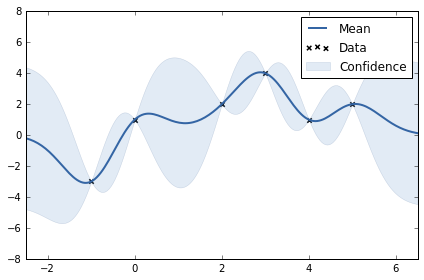

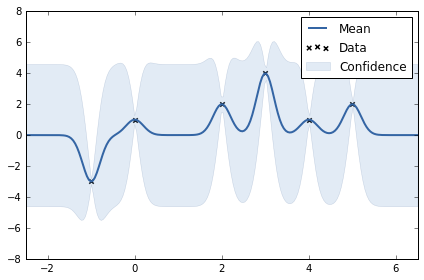

In [78]:
hyperparams = {
    #'optimal': {'variance': 6.34626286484, 'lengthscale': 0.838588574695},
    'shorty': {'.*lengthscale': 0.2, '.*Gaussian_noise.variance': 1e-10, '.*rbf.variance': 5.5},
    'lengthy': {'.*lengthscale': 3., '.*rbf.variance': 5.5},
    'proper': {'.*Gaussian_noise.variance': 1e-10, '.*rbf.variance': 5.5},
}

for name, hyperparam in hyperparams.items():
    kern = GPy.kern.RBF(input_dim=1)
    mdl = GPy.models.GPRegression(X, y, kern)
    for hyp, vlu in hyperparam.items():
        mdl[hyp] = vlu
        mdl[hyp].fix()
    mdl.optimize()
    print(name)
    print(mdl)
    mdl.plot()
    
    Xt, mu, Sigma = sample_from_kernel(kern)
    samples(Xt, mu, Sigma, "gp_presentation_{}_kern_sample_{{}}.dat".format(name))
    # Noiseless posterior for samples
    Xt, mu, Sigma = predictions(mdl, "gp_presentation_gp_{}.dat".format(name), noiseless=True)
    samples(Xt, mu, Sigma, "gp_presentation_{}_gp_sample_{{}}.dat".format(name))
    # Noisy posterior for plot
    Xt, mu, Sigma = predictions(mdl, "gp_presentation_gp_{}.dat".format(name), noiseless=False)

# Linear Model

In [ ]:
lin_kernel = GPy.kern.Linear(input_dim=1)
lin_model = GPy.models.GPRegression(X, y, lin_kernel)
lin_model.optimize()

In [ ]:
lin_model.plot()

In [ ]:
print(lin_model)

In [ ]:
m, mvar = lin_model.predict(np.array([[1.]]))

In [ ]:
m, np.sqrt(mvar)

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=1, whiten=False)

In [ ]:
pca.fit(np.hstack((X, y)))

In [ ]:
pca.components_